# Linear Regression

Implementation of multiple linear regression from scratch

**Problem Statement**
Predict the price of a house given it's size

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import copy

In [49]:
# load training data
data_file = 'data.txt'
df = pd.read_csv(data_file, names=['size', 'no. of bedrooms', 'price'], sep=',')

In [50]:
print(f"data size: {len(df)}")
df.head()

data size: 47


,size,no. of bedrooms,price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [51]:
def split_train_test(df, train_frac: float, seed=200):
    """
    splits the data into training and test data in the given required fraction of train data
    """
    train = df.sample(frac=train_frac, random_state=seed)
    test  = df.drop(train.index)
    return train, test

In [52]:
# split the data into training and testing set
train_data, test_data = split_train_test(df, 0.8)
print(f"training data - {len(train_data)}")
print(train_data.head())
print(f"\ntest data - {len(test_data)}")
print(test_data.head())

training data - 38
    size  no. of bedrooms   price
28  2200                3  475000
29  2637                3  299900
30  1839                2  349900
36  1239                3  229900
17  1236                3  199900

test data - 9
    size  no. of bedrooms   price
4   3000                4  539900
12  1890                3  329999
14  1268                3  259900
15  2300                4  449900
16  1320                2  299900


## Cost function

The cost function is used to get a sense of "how well our model is performing" <br>
It can be defined as:

<font size=4> J(**w**,b) = $\frac{1}{2m}$.$\sum_{i=1}^{m} (f_{\mathbf{w},b}(\mathbf{x}^{(i)}) - y^{(i)})^2$</font>

In [53]:
def compute_cost(X, y, w, b):
    m = X.shape[0]
    
    cost = 0
    for i in range(m):
        f_wb_i = np.dot(w, X[i]) + b
        cost = cost + (f_wb_i - y[i]) ** 2
    
    return cost * 0.5 / m

In [54]:
train_data[['size', 'price']] /= 1000
_X = train_data[['size', 'no. of bedrooms']].to_numpy()

array([[2.2  , 3.   ],
       [2.637, 3.   ],
       [1.839, 2.   ],
       [1.239, 3.   ],
       [1.236, 3.   ],
       [1.767, 3.   ],
       [3.89 , 3.   ],
       [1.852, 4.   ],
       [2.609, 4.   ],
       [1.985, 4.   ],
       [2.4  , 3.   ],
       [1.203, 3.   ],
       [1.437, 3.   ],
       [2.104, 3.   ],
       [1.2  , 3.   ],
       [1.38 , 3.   ],
       [1.416, 2.   ],
       [1.811, 4.   ],
       [1.94 , 4.   ],
       [1.   , 1.   ],
       [0.852, 2.   ],
       [4.478, 5.   ],
       [1.604, 3.   ],
       [2.04 , 4.   ],
       [1.888, 2.   ],
       [1.962, 4.   ],
       [4.215, 4.   ],
       [3.137, 3.   ],
       [1.664, 2.   ],
       [1.494, 3.   ],
       [2.132, 4.   ],
       [3.031, 4.   ],
       [1.427, 3.   ],
       [1.6  , 3.   ],
       [1.534, 3.   ],
       [2.   , 3.   ],
       [2.162, 4.   ],
       [2.526, 3.   ]])

In [55]:
X, y = _X, train_data['price'].to_numpy()
w_initial = np.zeros((X.shape[1],))
b_initial = 0
cost = compute_cost(X, y, w_initial, b_initial)
print(f"with w={w_initial} b={b_initial} \n{cost=:.4f}")

with w=[0. 0.] b=0 
cost=64732.5773


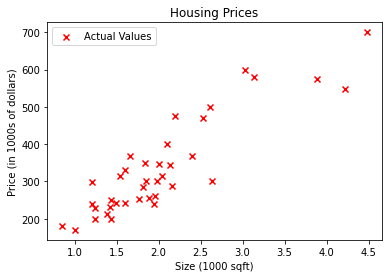

In [56]:
# plot training data
train_df = train_data[['size','price']]

plt.scatter(train_df['size'], train_df['price'], c='r', marker='x', label='Actual Values')

# Set the title
plt.title("Housing Prices")
# Set the y-axis label
plt.ylabel('Price (in 1000s of dollars)')
# Set the x-axis label
plt.xlabel('Size (1000 sqft)')
plt.legend()
plt.show()

## Gradient Descent

In [57]:
def compute_gradient(X, y, w, b):
    m, n = X.shape
    
    dj_dw = np.zeros((n,))
    dj_db = 0
    
    for i in range(m):
        err = np.dot(w, X[i]) + b - y[i]
        
        for j in range(n):
            dj_dw[j] += err * X[i,j]
            
        dj_db += err
    
    dj_dw /= m
    dj_db /= m
    
    return dj_db, dj_dw

In [58]:
def gradient_descent(X, y, w_initial, b_initial, cost_function, gradient_function, alpha, num_iter):
    w = copy.deepcopy(w_initial)
    b = b_initial
    j_history = []
    
    for i in range(num_iter):
        dj_db, dj_dw = gradient_function(X, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
        
        if i < 10000000:
            j_history.append(cost_function(X, y, w, b))
        
        if i % (num_iter // 10) == 0:
            print(f"Iteration {i:4d}: Cost {j_history[-1]:8.2f}")
    
    return w, b, j_history

In [59]:
w, b, j_history = gradient_descent(X, y, w_initial, b_initial, compute_cost, compute_gradient, 5.0e-6, 1000000)

Iteration    0: Cost 64722.93
Iteration 100000: Cost  3517.25
Iteration 200000: Cost  2995.25
Iteration 300000: Cost  2624.79
Iteration 400000: Cost  2361.50
Iteration 500000: Cost  2174.01
Iteration 600000: Cost  2040.15
Iteration 700000: Cost  1944.27
Iteration 800000: Cost  1875.29
Iteration 900000: Cost  1825.38


In [60]:
def predict(x, w, b):
    return np.dot(x, w) + b

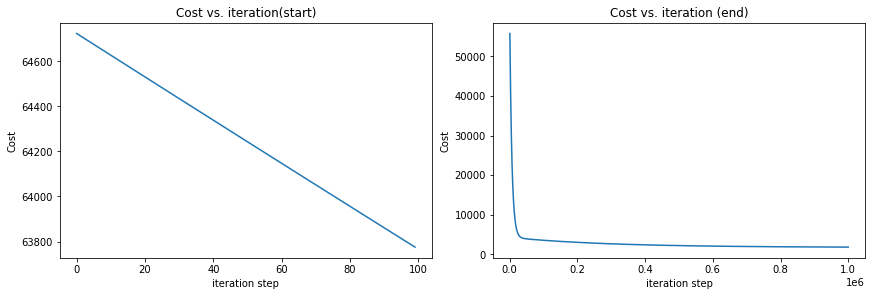

In [61]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_history[:100])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

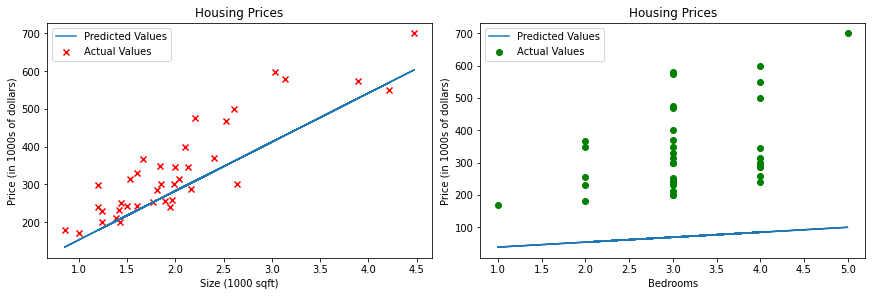

In [62]:
# plot training data and the model
train_df = train_data[['size','price', 'no. of bedrooms']]

fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(train_df['size'], train_df['size'] * w[0] + b, label='Predicted Values')
ax1.scatter(train_df['size'], train_df['price'], c='r', marker='x', label='Actual Values')
ax1.set_title("Housing Prices")
ax1.set_ylabel('Price (in 1000s of dollars)')
ax1.set_xlabel('Size (1000 sqft)')
ax1.legend()

ax2.plot(train_df['no. of bedrooms'], train_df['no. of bedrooms'] * w[1] + b, label='Predicted Values')
ax2.scatter(train_df['no. of bedrooms'], train_df['price'], c='g', marker='o', label='Actual Values')
ax2.set_title("Housing Prices")
ax2.set_ylabel('Price (in 1000s of dollars)')
ax2.set_xlabel('Bedrooms')
ax2.legend()

plt.show()

In [63]:
def compute_accuracy(X, y, w, b):
    accuracy = 0
    m = X.shape[0]
    
    for i in range(m):
        accuracy += 1 - abs(X[i].dot(w) + b - y[i]) / y[i]
    
    return accuracy / m

In [64]:
test_data[['size', 'price']] /= 1000
_X = test_data[['size', 'no. of bedrooms']].to_numpy()
X = _X
y = test_data['price'].to_numpy()
print(f'accuracy={compute_accuracy(X, y, w, b) * 100:.2f}%')

accuracy=81.29%


In [71]:
predict([3, 3], w, b) * 1000

458229.17973293836